In [1]:
# importa las librerías
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

In [2]:
# carga el conjunto de datos de dígitos MNIST
data_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = data_mnist.load_data()

In [3]:
# despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


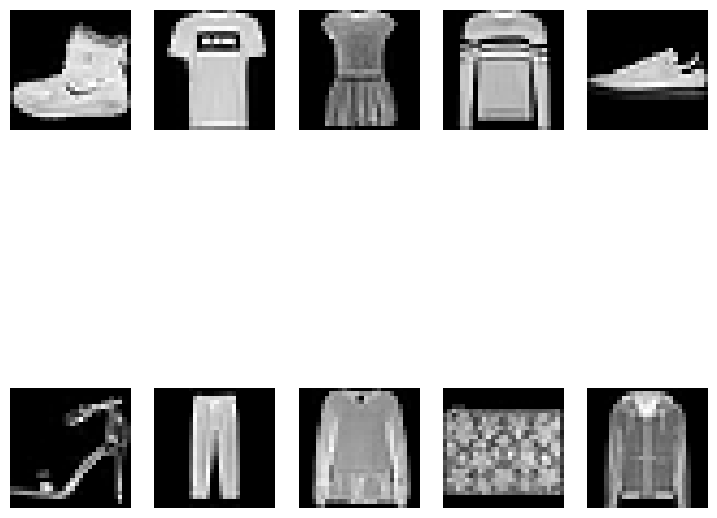

In [4]:
# despliega algunas imágenes del dataset
cc = [0,1,3,5,6,8,21,18,23,28]  # un ejemplo de cada clase/objeto.
fig=plt.figure(figsize=(9,9)) # figure size, inches
k=1
for i in cc:
  fig.add_subplot(2, 5, k)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')
  k += 1

In [5]:
# normaliza las intensidades de los pixeles de las imágenes 
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   
   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [9]:
# define algunos hiper-parámetros
n_epochs=15
n_batch=64
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [10]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt, 
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [11]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/15
938/938 [==============================] - 32s 32ms/step - loss: 1.0628 - accuracy: 0.6070 - val_loss: 0.9199 - val_accuracy: 0.6783
Epoch 2/15
938/938 [==============================] - 28s 30ms/step - loss: 0.5692 - accuracy: 0.7923 - val_loss: 0.5199 - val_accuracy: 0.8113
Epoch 3/15
938/938 [==============================] - 27s 29ms/step - loss: 0.4806 - accuracy: 0.8256 - val_loss: 0.9489 - val_accuracy: 0.6765
Epoch 4/15
938/938 [==============================] - 30s 32ms/step - loss: 0.4368 - accuracy: 0.8411 - val_loss: 0.4553 - val_accuracy: 0.8314
Epoch 5/15
938/938 [==============================] - 29s 31ms/step - loss: 0.4041 - accuracy: 0.8533 - val_loss: 0.4319 - val_accuracy: 0.8477
Epoch 6/15
938/938 [==============================] - 28s 30ms/step - loss: 0.3836 - accuracy: 0.8605 - val_loss: 0.4007 - val_accuracy: 0.8513
Epoch 7/15
938/938 [==============================] - 28s 30ms/step - loss: 0.3717 - accuracy: 0.8651 - val_loss: 0.3885 - val_accuracy:

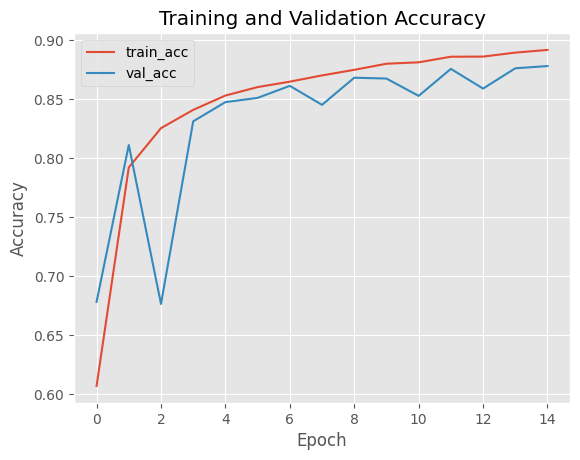

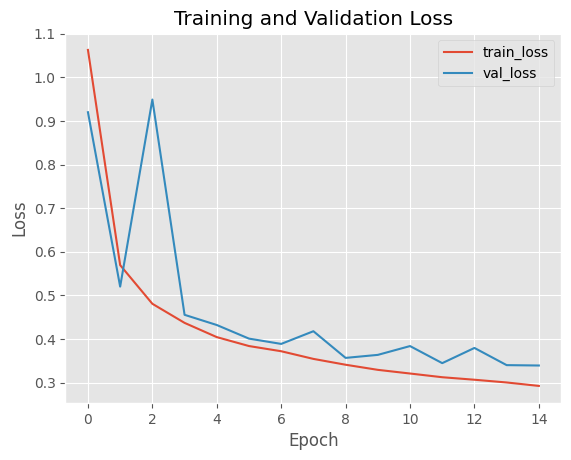

In [12]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()